#### How to load the dataframe with videos and features (from 2019)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# Run:
videos_features = pd.read_parquet('generated/2019/2019_videos_Typo_Emojis_NegWords_Sentiment_title_desc.parquet', engine='fastparquet')

In [5]:
videos_features

,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,upload_date,view_count,count_words_title,...,count_negative_emojis_title,count_upper_words_title,count_excl_marks_title,count_upper_words_description,count_excl_marks_description,count_negative_emojis_description,sia_negative_description,sia_neutral_description,sia_positive_description,sia_compound_description
0,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:57.427254,35,JOeSxtcNdHQ,8620,1673,2019-10-01,48737,6,...,0,0,0,2,0,0,0.000,0.929,0.071,0.0772
1,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:58.108323,15,EPMLTw2zINw,355,1297,2019-10-01,19999,2,...,0,0,0,0,0,0,0.000,0.000,0.000,0.0000
2,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:58.773085,78,Y1_pK68iSYQ,603,3305,2019-09-28,58518,10,...,0,0,0,2,0,0,0.047,0.870,0.084,0.3877
3,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:59.465346,70,jF8TSo3ZfTc,1426,1889,2019-09-21,71998,16,...,0,1,0,10,0,0,0.000,0.943,0.057,0.7213
4,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:40:00.188768,73,Gp00dNaVouo,990,2699,2019-09-14,101924,10,...,0,0,0,15,1,0,0.033,0.967,0.000,-0.3664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12723119,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:38:51.649137,0,9pJ89IFoWbY,87,4,2019-08-06,158,12,...,0,1,0,1,1,0,0.000,0.794,0.206,0.5707
12723120,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:38:44.519636,1,YB1fBzL6RWs,58,27,2019-08-06,669,13,...,0,0,0,0,1,0,0.000,0.808,0.192,0.5707
12723121,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:38:46.890669,1,Y9eUxJBHFpc,77,4,2019-08-06,263,13,...,0,0,0,0,1,0,0.000,0.808,0.192,0.5707
12723122,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:38:49.212538,0,cR45-7Tg0WU,106,4,2019-08-06,123,12,...,0,0,0,0,1,0,0.000,0.802,0.198,0.5707


#### Combine timeseries and videos to get ratios 

For each video, we want to get the ratio of like by subscribers of the channel that uploaded the video. As well as the ratio of dislike by subscribers, and views by total views of the channel. To do this, we need to merge the timeseries dataframe and the videos features dataframe on the date, grouping them by channel id.

Since we want to get the most accurate number of subscribers at the time of upload of the given video, we perform a nearest time merge, where we only merge on the entry of timeseries that has the closest datetime to the upload date, given a tolerance of one week (as the timeseries analysis was conducted per week). 

First step is to load the timeseries and filter out the years that are not used in our study (here we only keep 2019 for the moment)

In [7]:
df_timeseries = pd.read_csv("data/df_timeseries_en.tsv", sep="\t")
df_timeseries_2019 = df_timeseries[pd.to_datetime(df_timeseries["datetime"]).dt.year == 2019]

In [8]:
df_timeseries_2019

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
79,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2019-01-06 23:00:00,1.681183e+07,72195.713542,62296.364583,88.494792,24,0,0
80,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2019-01-13 23:00:00,1.687644e+07,64606.010417,62363.562500,67.197917,24,0,0
81,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2019-01-20 23:00:00,1.693356e+07,57117.354167,62432.989583,69.427083,24,0,0
82,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2019-01-27 23:00:00,1.699153e+07,57972.250000,62476.739583,43.750000,26,2,2
83,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2019-02-03 23:00:00,1.709303e+07,101502.713542,62749.244792,272.505208,26,0,2
...,...,...,...,...,...,...,...,...,...,...
18872494,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-02 00:00:00,6.012938e+06,232418.277778,61268.611111,1305.611111,278,2,10
18872495,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-09 00:00:00,6.244579e+06,231640.888889,62631.666667,1363.055556,287,9,13
18872496,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-16 00:00:00,6.480902e+06,236322.933333,64010.000000,1378.333333,294,7,16
18872497,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-23 00:00:00,6.745317e+06,264415.200000,65480.000000,1470.000000,301,7,15


Then, we rename the columns accordingly for the merge asof

In [9]:
df_timeseries_2019["datetime"] = pd.to_datetime(df_timeseries_2019["datetime"])
df_timeseries_2019.rename({"datetime": "nearest_time"}, axis=1, inplace=True)
videos_features.rename({"upload_date": "nearest_time"}, axis=1, inplace=True)
df_timeseries_2019.rename({"channel": "channel_id"}, axis=1, inplace=True)

/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_40052/1601588160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeseries_2019["datetime"] = pd.to_datetime(df_timeseries_2019["datetime"])
/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_40052/1601588160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeseries_2019.rename({"datetime": "nearest_time"}, axis=1, inplace=True)
/var/folders/q7/f8dwgjdx3yz9l8nhprlwzdjw0000gn/T/ipykernel_40052/1601588160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [10]:
videos_on_date_by_channel = pd.merge_asof(videos_features.sort_values("nearest_time"),df_timeseries_2019.sort_values("nearest_time"),on="nearest_time",by="channel_id",allow_exact_matches=True,direction="nearest",tolerance=pd.Timedelta(1,unit="W"))

Since some videos were uploaded by channels that are not in the timeseries, we end up with NaN values. We decided to remove the rows that have these NaN values.

In [11]:
# approx 1M missing values (channels that are in metadata but not in timeseries)
videos_on_date_by_channel.dropna(axis=0,inplace=True)
videos_on_date_by_channel

,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,nearest_time,view_count,count_words_title,...,sia_positive_description,sia_compound_description,category,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,Gaming,UCLnXoGn0jJP0SLWYaBJY0hg,2019-11-03 10:07:08.306647,2,VIhHtq91CO4,462,19,2019-01-01,1288,9,...,0.131,0.5931,Gaming,1.346410e+08,1.157354e+05,162561.994792,185.036458,1487.0,3.0,4.0
1,Gaming,UCE4jGykiynTSb0--B9mPG8g,2019-11-14 12:36:06.619456,0,zPZwFFnYEDU,1378,11,2019-01-01,333,12,...,0.248,0.9673,Gaming,1.575515e+06,2.117766e+04,7671.145833,65.625000,1747.0,15.0,31.0
2,Gaming,UCE4jGykiynTSb0--B9mPG8g,2019-11-14 12:36:05.960395,2,Y-iZVYVnYfU,1570,73,2019-01-01,2500,12,...,0.163,0.9526,Gaming,1.575515e+06,2.117766e+04,7671.145833,65.625000,1747.0,15.0,31.0
3,Gaming,UCE4jGykiynTSb0--B9mPG8g,2019-11-14 12:36:05.284794,0,xkY70DZOzOI,1931,34,2019-01-01,236,7,...,0.296,0.9818,Gaming,1.575515e+06,2.117766e+04,7671.145833,65.625000,1747.0,15.0,31.0
4,Entertainment,UCz1hQ68G3XPVYEBoFDgSjcQ,2019-10-31 06:30:29.530833,301,AN-gOFkARS0,234,4616,2019-01-01,392878,15,...,0.000,0.0000,Entertainment,8.583157e+08,7.898651e+06,901069.244792,8648.427083,4228.0,9.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12722774,Travel & Events,UCG400TyZ1-aF40zQ5n9YzRw,2019-11-20 09:58:52.249068,1,gu4KOheZWFE,158,30,2019-10-07,311,7,...,0.000,0.0000,Travel & Events,3.763106e+06,1.046215e+04,10557.738095,57.738095,903.0,0.0,0.0
12722776,Sports,UCSAys3yHQjH5n8y082xgHNg,2019-10-29 20:15:35.559773,2,bSz-mrswUoQ,1001,8,2019-10-07,407,13,...,0.043,0.3987,Sports,2.013157e+06,2.277900e+04,13242.857143,165.079365,530.0,12.0,24.0
12722777,Entertainment,UCIH2zL6aS5RUKLKnemQ_k0Q,2019-11-08 11:55:16.549981,0,DUzM6nyuJoc,2597,44,2019-10-07,4992,5,...,0.091,0.7865,Entertainment,2.059584e+07,5.660081e+04,34285.714286,94.047619,1913.0,0.0,0.0
12722778,Gaming,UCoxof40YutASfqx43YLSXYA,2019-11-14 07:13:53.071427,13,jeQ1GA3PIDQ,267,267,2019-10-07,10273,12,...,0.045,-0.5383,Gaming,1.866567e+07,2.200586e+04,25200.000000,9.333333,313.0,0.0,2.0


We create new columns for the ratios

In [12]:
def create_ratio_column(df, new_col,col1,col2):
        df[new_col] = df[col1]/df[col2]

create_ratio_column(videos_on_date_by_channel,"like_count_by_subs","like_count","subs")
create_ratio_column(videos_on_date_by_channel,"dislike_count_by_subs","dislike_count","subs")
create_ratio_column(videos_on_date_by_channel,"view_count_by_channel_views","view_count","views")

Let's now plot the distribution of the number of views between all the videos and the distribution of the number of subscribers between all the channels. In fact, knowing this information will helps us decide what kind of normalization should be use in the rest of the project.

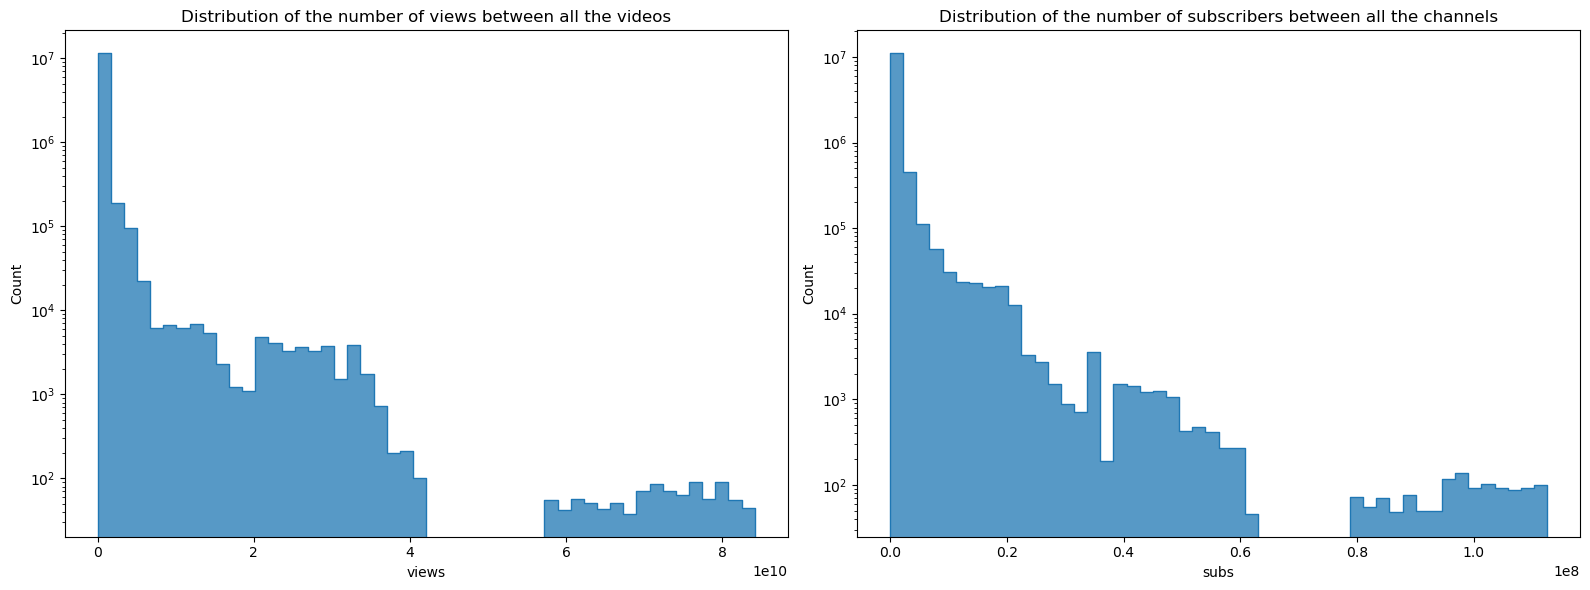

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

sns.histplot(videos_on_date_by_channel, x="views", bins=50, element="step", ax=axes[0])
sns.histplot(videos_on_date_by_channel, x="subs", bins=50, element="step", ax=axes[1])

axes[0].set(yscale ='log')
axes[0].set_title('Distribution of the number of views between all the videos')

axes[1].set(yscale ='log')
axes[1].set_title('Distribution of the number of subscribers between all the channels')

plt.tight_layout()
plt.show()

Those plots show that a standardization would not be acceptable in this case. In fact, the distributions are left-skewed. A logarithmique normalization is more suitable.